# Training BERT-based Sequence Classification Models on an Emotion Dataset Created for NLP Tasks

**In this notebook, you'll discover the complete end-to-end process for training your preferred model using the `MulticlassClassificationTrainer().`**

*Note: This current setup is designed for a technical test. You have the flexibility to adjust the number of epochs and other parameters as needed. Additionally, please note that we have only used a small portion of the original dataset for the sake of this quick technical test. For actual experiments, it is recommended to utilize the entire dataset to ensure comprehensive results.*

# Import Packages

In [1]:
import torch
import pandas as pd
import os
import logging

#Note: Adjust The Path As Needed
import sys
sys.path.append(os.path.dirname(os.getcwd()))
print(sys.path)

from model.Multiclass_BERT_RoBERTa import MulticlassClassificationTrainer
logging.getLogger("matplotlib.colorbar").setLevel(logging.ERROR)

['/Users/hamulbaghdasaryan/Desktop/GenAI_project/Emotion_Draw/bert_part/notebooks', '/Users/hamulbaghdasaryan/anaconda3/lib/python311.zip', '/Users/hamulbaghdasaryan/anaconda3/lib/python3.11', '/Users/hamulbaghdasaryan/anaconda3/lib/python3.11/lib-dynload', '', '/Users/hamulbaghdasaryan/anaconda3/lib/python3.11/site-packages', '/Users/hamulbaghdasaryan/anaconda3/lib/python3.11/site-packages/aeosa', '/Users/hamulbaghdasaryan/Desktop/GenAI_project/Emotion_Draw/bert_part']


/Users/hamulbaghdasaryan/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


# Choose a Model 

**Set a Suffix to Indicate Your New Experiment (e.g., `experiment-N`)**

In [2]:
model_names = ['bert-base-uncased', 'roberta-base', 'albert-base-v2']
MODEL_NAME = 'albert-base-v2'
SUFFIX = 'experiment-tech-test'

# Specify the Parameters

In [3]:
num_labels = 6
batch_size = 32
num_epochs = 3
learning_rate = 1e-5
max_length = 128

# Device

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the Class

In [5]:
trainer = MulticlassClassificationTrainer(MODEL_NAME, num_labels, batch_size, num_epochs, learning_rate, max_length, device, suffix = SUFFIX)

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# Load Data

In [6]:
train_df = pd.read_csv('../data/processed/train_data.csv')
val_df = pd.read_csv('../data/processed/val_data.csv')

In [7]:
train_df = train_df.head(200)

In [8]:
val_df = val_df.head(200)

# Training

In [9]:
# Allow to add files in the runs directory
!chmod u+w ../runs

In [10]:
log_dir = f'../runs/{MODEL_NAME}_{SUFFIX}'

In [11]:
# Train the model
trainer.train(train_df, val_df, log_dir)

Starting training from scratch
Initial Epoch 0/3 - Train Loss: 1.8665479932512556 - Train Accuracy: 10.50%  - Train F1 Score: 5.73%
Initial Epoch 0/3 - Validation Loss: 1.8152227401733398 - Validation Accuracy: 12.50%  - Validation F1 Score: 5.95%


  0%|          | 0/7 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


100%|██████████| 7/7 [00:38<00:00,  5.50s/it]


Epoch 1/3 - Train Loss: 1.7647577013288225 - Train Accuracy: 25.50% - Train F1 Score: 16.37%


100%|██████████| 7/7 [00:10<00:00,  1.54s/it]


Epoch 1/3 - Validation Loss: 1.6404567956924438 - Validation Accuracy: 32.00%  - Validation F1 Score: 10.99%
Saved the best model multiclass_experiment-tech-test_albert-base-v2_best_checkpoint.pth with validation loss: 1.6404567956924438, Epoch: 1
Note: The model will be overwritten if a better model, based on the validation loss, is found.


100%|██████████| 7/7 [00:38<00:00,  5.54s/it]


Epoch 2/3 - Train Loss: 1.6920536245618547 - Train Accuracy: 33.00% - Train F1 Score: 10.23%


100%|██████████| 7/7 [00:10<00:00,  1.50s/it]


Epoch 2/3 - Validation Loss: 1.602907725742885 - Validation Accuracy: 29.00%  - Validation F1 Score: 7.49%
Saved the best model multiclass_experiment-tech-test_albert-base-v2_best_checkpoint.pth with validation loss: 1.602907725742885, Epoch: 2
Note: The model will be overwritten if a better model, based on the validation loss, is found.


100%|██████████| 7/7 [00:40<00:00,  5.82s/it]


Epoch 3/3 - Train Loss: 1.5790480545588903 - Train Accuracy: 39.00% - Train F1 Score: 13.29%


100%|██████████| 7/7 [00:11<00:00,  1.58s/it]


Epoch 3/3 - Validation Loss: 1.588389822414943 - Validation Accuracy: 27.50%  - Validation F1 Score: 7.63%
Saved the best model multiclass_experiment-tech-test_albert-base-v2_best_checkpoint.pth with validation loss: 1.588389822414943, Epoch: 3
Note: The model will be overwritten if a better model, based on the validation loss, is found.
Saved the final model multiclass_experiment-tech-test_albert-base-v2_epoch3_checkpoint.pth with validation loss: 1.588389822414943, Epoch: 3


# (Load and) Evaluate the Preferred Model on the Test Set

In [12]:
model_path = "../models_trained/multiclass_experiment-tech-test_albert-base-v2_best_checkpoint.pth"

trainer.load_model(model_path)

In [13]:
test_df = pd.read_csv('../data/processed/test_data.csv')
test_df = test_df.head(100)

In [14]:
# Evaluate on the test set
trainer.evaluate(test_df, mode = 'test')


Test Set - Average Loss: 1.6

Test Set Accuracy: 31.00%

Test Set F1 Score: 8.84%


(1.6171848475933075,
 0.31,
 0.08837408837408837,
 array([[ 0,  0, 15,  0,  2,  0],
        [ 0,  0, 11,  0,  1,  0],
        [ 0,  0, 30,  0,  1,  0],
        [ 0,  0,  5,  0,  0,  0],
        [ 0,  0, 31,  0,  1,  0],
        [ 0,  0,  3,  0,  0,  0]]))

In [15]:
model_path = "../models_trained/multiclass_experiment-tech-test_albert-base-v2_epoch3_checkpoint.pth"

trainer.load_model(model_path)

In [16]:
# Evaluate on the test set
trainer.evaluate(test_df, mode = 'test')


Test Set - Average Loss: 1.6

Test Set Accuracy: 31.00%

Test Set F1 Score: 8.84%


(1.6171848475933075,
 0.31,
 0.08837408837408837,
 array([[ 0,  0, 15,  0,  2,  0],
        [ 0,  0, 11,  0,  1,  0],
        [ 0,  0, 30,  0,  1,  0],
        [ 0,  0,  5,  0,  0,  0],
        [ 0,  0, 31,  0,  1,  0],
        [ 0,  0,  3,  0,  0,  0]]))

# Inference for a Sigle Example

In [17]:
checkpoint = "../models_trained/multiclass_experiment-tech-test_albert-base-v2_best_checkpoint.pth"

In [18]:
sentence = "Im blocking this guy because he gets on my nerves."
trainer.single_inference(checkpoint, train_df, sentence )

[[{'label': 'joy', 'score': 0.3771490156650543},
  {'label': 'sadness', 'score': 0.26625576615333557},
  {'label': 'anger', 'score': 0.13529077172279358}]]

In [19]:
sentence = "My boss made me do all the frustrating work."
trainer.single_inference(checkpoint, train_df, sentence )

[[{'label': 'joy', 'score': 0.35304948687553406},
  {'label': 'sadness', 'score': 0.27892670035362244},
  {'label': 'anger', 'score': 0.1487378627061844}]]

# Display Confusion Matrices

*Note: Confusion matrices for the training, validation, and test sets have been saved. If you've initialized the `MulticlassClassificationTrainer()` class and completed training, simply run the cells below to display the matrices. Otherwise, you can access the pre-saved confusion matrices from `../reports/figures`.*


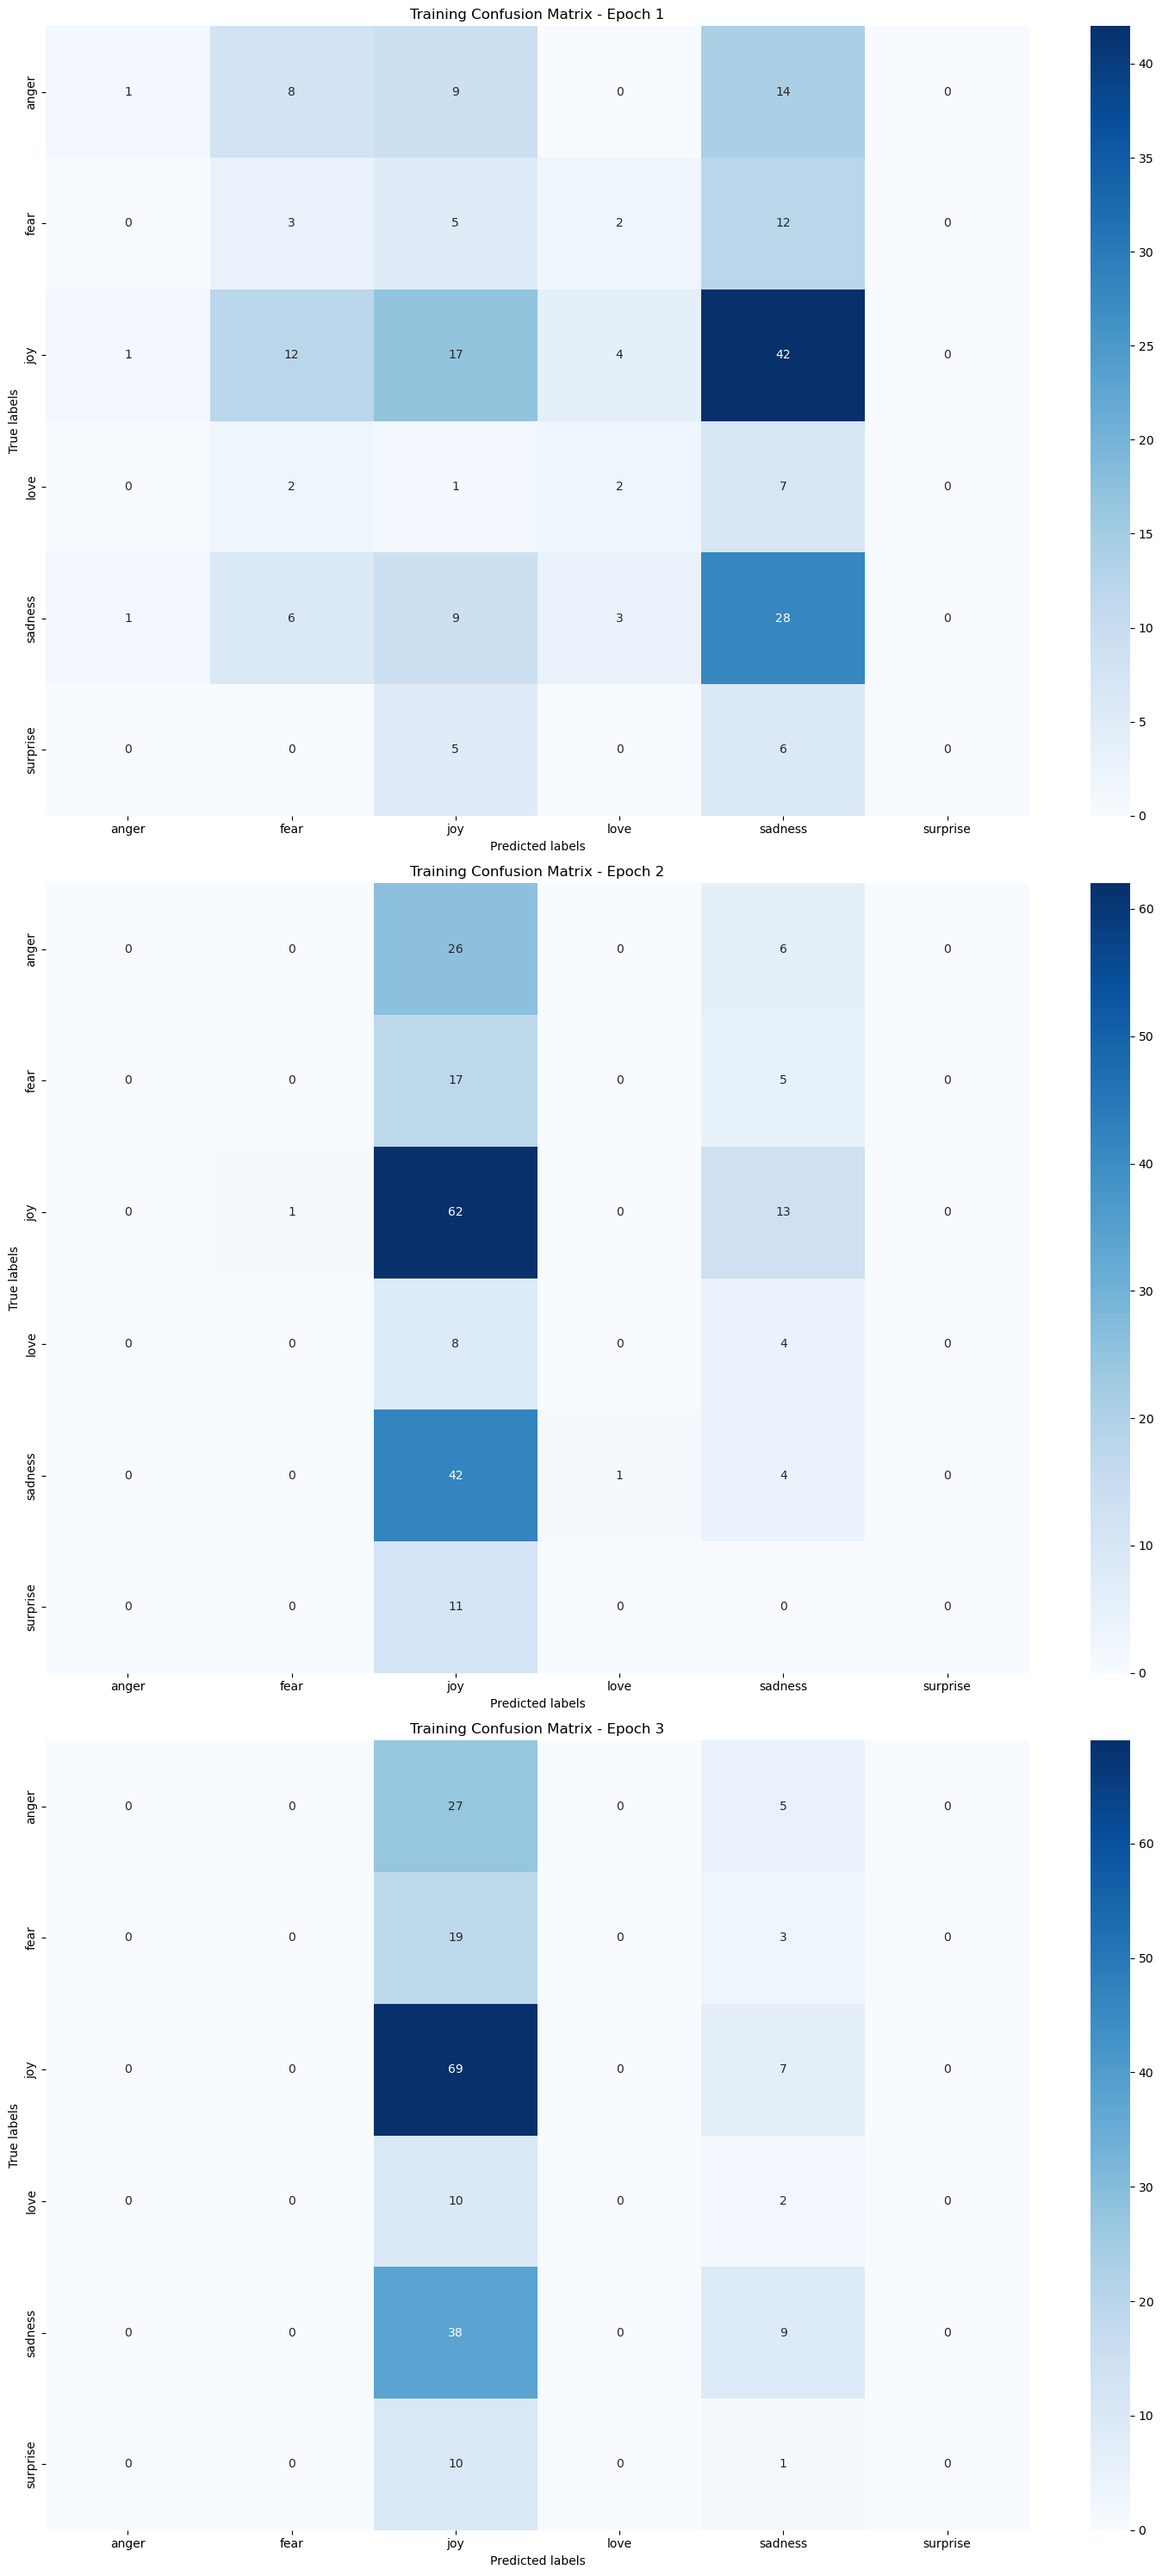

In [20]:
trainer.print_cm(mode="train",df = train_df)

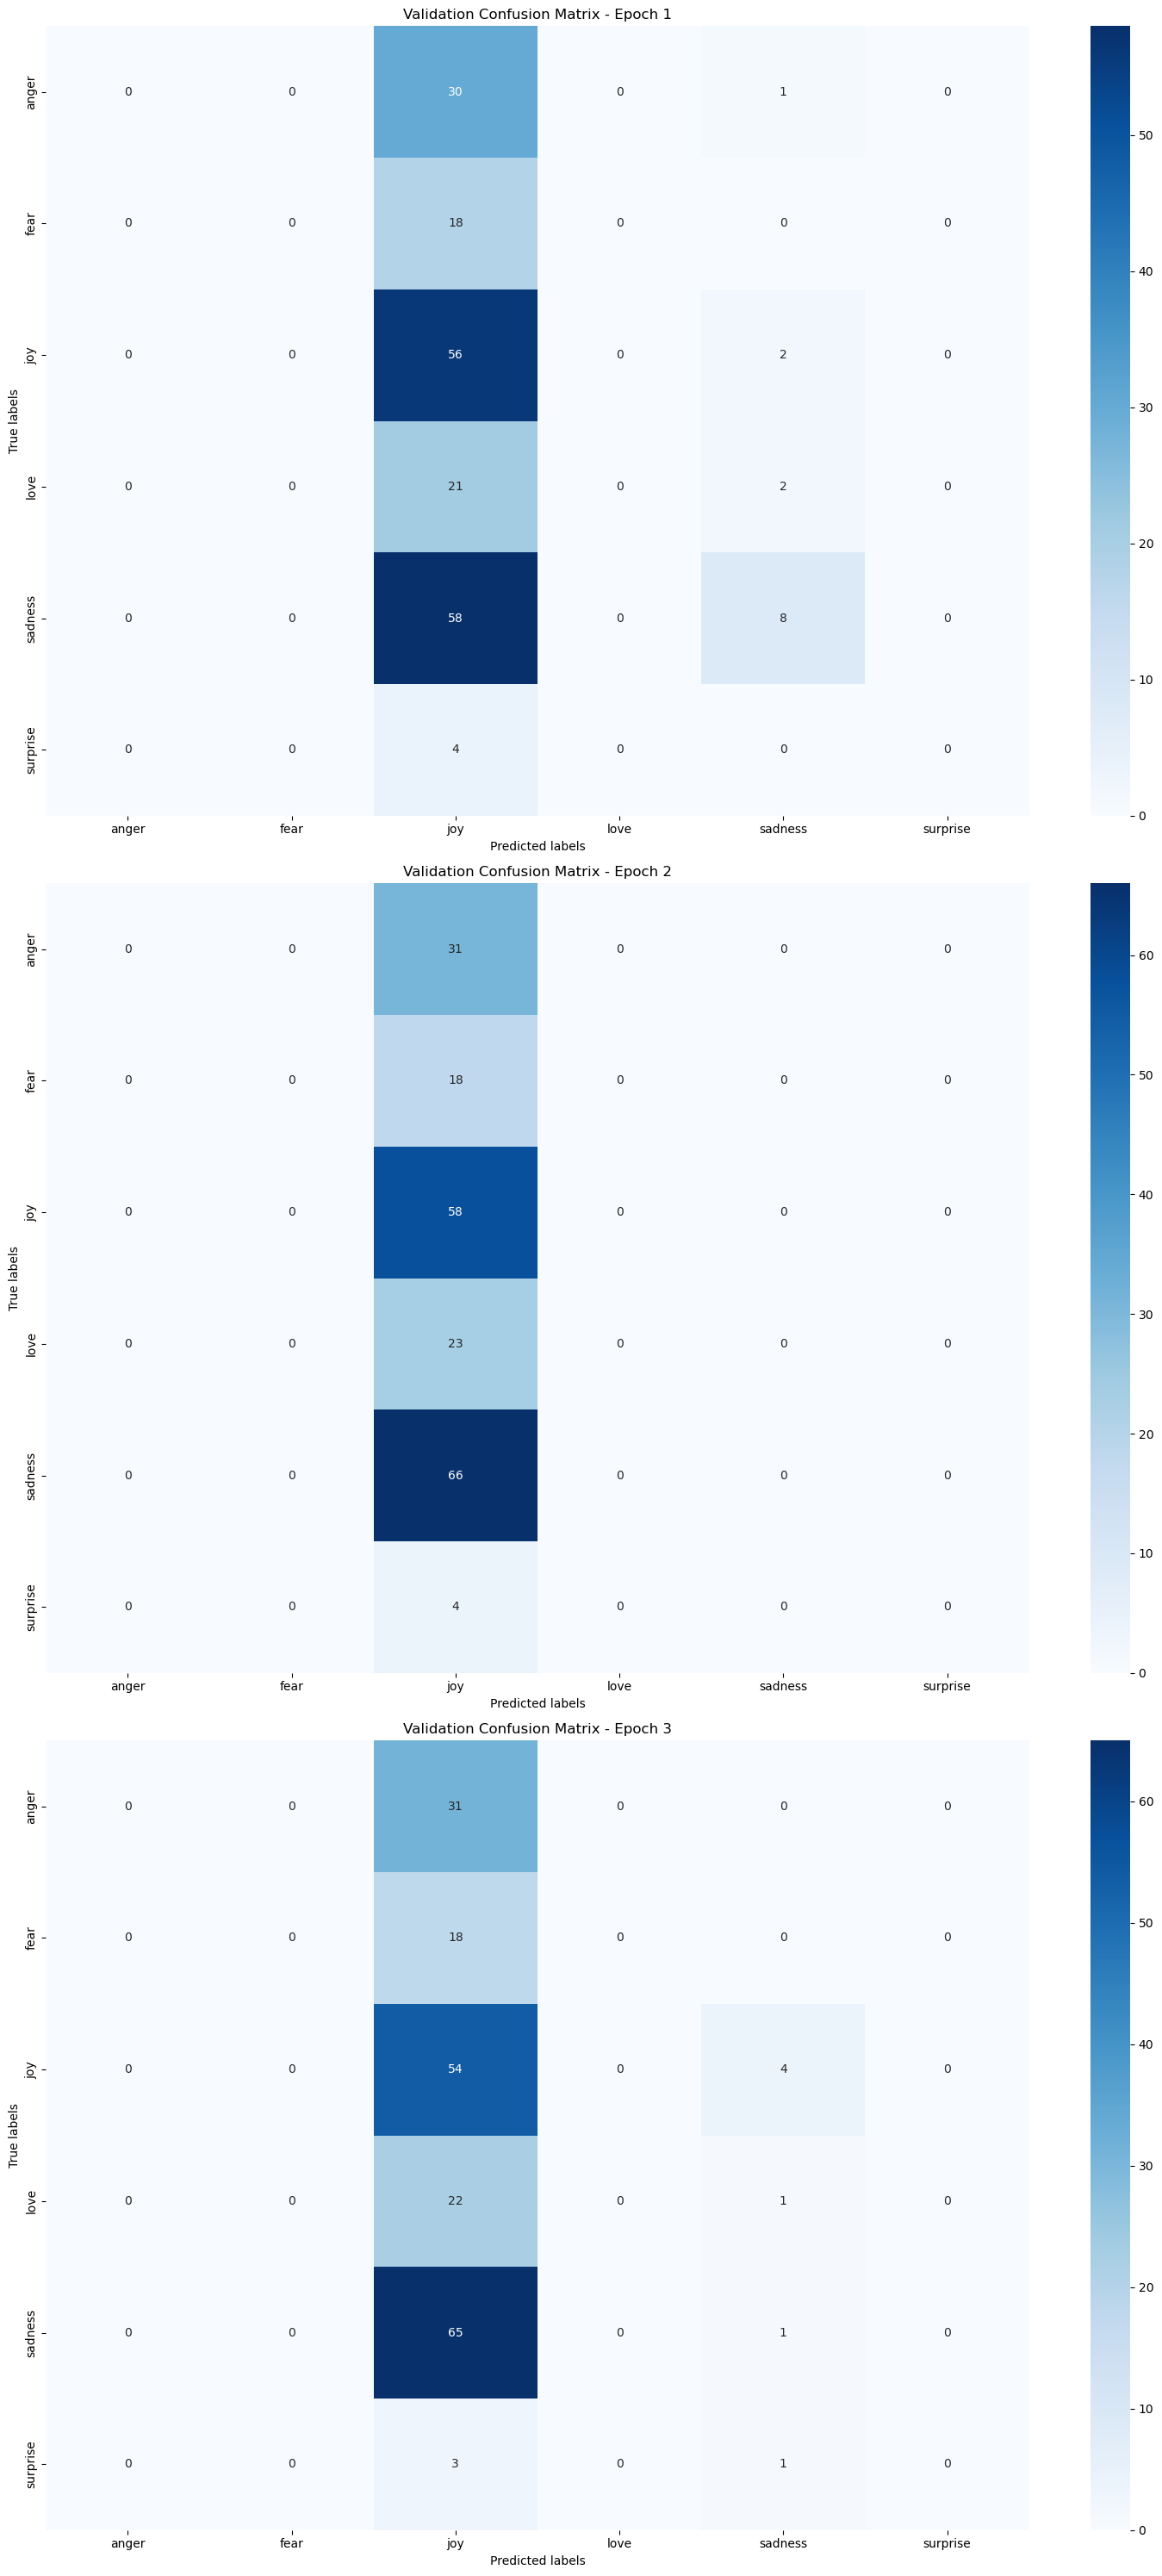

In [21]:
trainer.print_cm(mode="val", df = val_df)

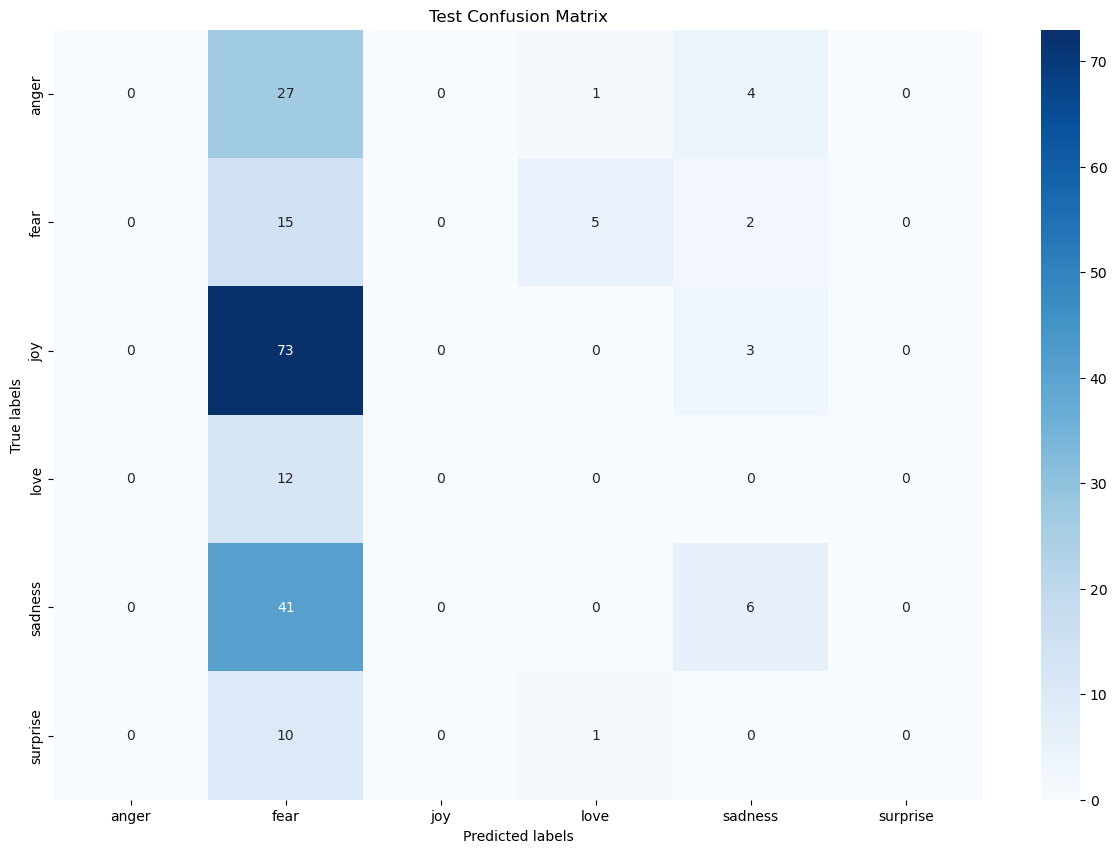

In [22]:
trainer.print_cm(mode="test", df = test_df)

# Tenserboard

**Run the cell below to start a Tensorboard process on port `6008` (feel free to adjust the port as necessary).**

In [ ]:
%reload_ext tensorboard
%tensorboard --logdir=../runs --port=6008 --load_fast=false

**If the specified port is busy, run the cell below to identify the `PID` (Process ID) of the process.**

In [24]:
#!lsof -i :6008

COMMAND       PID      USER   FD   TYPE   DEVICE SIZE/OFF NODE NAME
tensorboa 3281558 azureuser   10u  IPv4 95302168      0t0  TCP localhost:6008 (LISTEN)


**To terminate the process identified by its PID from the previous cell, run the cell below using the `kill` command.**

In [26]:
#!kill 3281558